
# Project: Investigate a Dataset (Big Mart Sales prediction!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='wrangling'></a>
## Introduction
> Here is the dataset description

![title](ERD.JPg)

In [1]:
# importing packages.
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from statsmodels.formula.api import  ols

%matplotlib inline

In [2]:
import seaborn as sns
sns.set()

### Questions to be answered


<ul>
    <li><a href="#q1">What is the items weight distribution?</a></li>
    <li><a href="#q2">What is the fat content distribution?</a></li>
    <li><a href="#q3">What is the visibility distribution?</a></li>
    <li><a href="#q4">What is the most common item type?</a></li>
    <li><a href="#q5">What is the MRP distribution?</a></li>
    <li><a href="#q6">What is the most common outlet size?</a></li>
    <li><a href="#q7">What is the correlations between the variables?</a></li>
    <li><a href="#q8">What is the most selling outlet?</a></li>
    <li><a href="#q9">What is the correlation beween the MRP and the outlet sales?</a></li>
    <li><a href="#q10">What is the most selling item's fat content?</a></li>
    <li><a href="#q11">Does the outlet size affect the fat content sales?</a></li>
    <li><a href="#q12">What item type has the most sales</a></li>
</ul>


<a id='wrangling'></a>
## Data Wrangling


### Gathering Data
Load data and print a few lines. Perform operations to inspect data


In [3]:
df = pd.read_csv('train.csv')
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7240,NCW54,7.500,Low Fat,0.000000,Household,59.2588,OUT049,1999,Medium,Tier 1,Supermarket Type1,916.1408
5842,FDV47,17.100,Low Fat,0.054428,Breads,84.9566,OUT018,2009,Medium,Tier 3,Supermarket Type2,1014.6792
7352,DRE25,15.350,LF,0.073698,Soft Drinks,91.9120,OUT017,2007,NaN,Tier 2,Supermarket Type1,559.2720
7922,FDG10,NaN,Regular,0.010886,Snack Foods,57.2588,OUT027,1985,Medium,Tier 3,Supermarket Type3,801.6232
7451,FDT16,9.895,Regular,0.048861,Frozen Foods,260.2278,OUT018,2009,Medium,Tier 3,Supermarket Type2,4165.2448


### Assessing Data

In [4]:
# How many records are in the dataset
df.shape

(8523, 12)

In [5]:
#check duplicates values
print('duplicate values : ',sum(df.duplicated()))

duplicate values :  0


###### There is no duplicate data

In [6]:
# count of null values in each col
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Item_Weight and Outlet_Size  has Null Values ,  total Row is 8523     


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# Number of unique values for each column
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
# Reviewing the unique values for the catagorical columns
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for x in cat_col:
    print("Value Counts for the col :", x)
    print('-' * 50)
    print(df[x].value_counts(),'\n')

Value Counts for the col : Item_Fat_Content
--------------------------------------------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Value Counts for the col : Item_Type
--------------------------------------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Value Counts for the col : Outlet_Size
--------------------------------------------------
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Value Counts for 

In [10]:
df.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

### Some notes on the dataset
>* There is 1559 differnt item and 10 different stores.
>* There is 16 different items type in the stores.
>* The data contain store built between 1985 and 2009.
>* There is two main outlet types (supermarket and Grocery Store).
>* There is two types of fat content (Low and regular), Howevere they are written in different formats.
>* The most common outlet sizes for Tier 1 and Tier 2 is Small, most common size for is Tier 3 is  Medium.



### Data Cleaning 

>* Fill in the missing values for Item_Weight and Outlet_Size.
>* Change the fat content to be consetent.


In [11]:
# Fill the missing values for the Item_Weight using the items_id mean value
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
df['Item_Weight'].isnull().sum()

4

In [12]:
# Fill in the remaining missings values with the col mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)
df['Item_Weight'].isnull().sum()

0

In [13]:
# Fill the Tier 2, Tier 3 outlet sizes with its most common values
m1 = (df['Outlet_Location_Type'] == 'Tier 2')
m2 = (df['Outlet_Location_Type'] == 'Tier 3')

df.loc[m1,'Outlet_Size'] = df.loc[m1,'Outlet_Size'].fillna('Small')
df.loc[m2,'Outlet_Size'] = df.loc[m2,'Outlet_Size'].fillna('Medium')

# Check if there is still Nulls
df['Outlet_Size'].isnull().sum()

0

In [14]:
# Replace the fat content values to be consetent
df['Item_Fat_Content'].replace(['LF', 'low fat'],'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg','Regular', inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<h5>Now that our data set is clean, we can start the next step  exploratory data analysis (EDA).<h5>

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### What is  the items weight distribution?

count    8523.000000
mean       12.875420
std         4.645008
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(6.9832, 19.0)

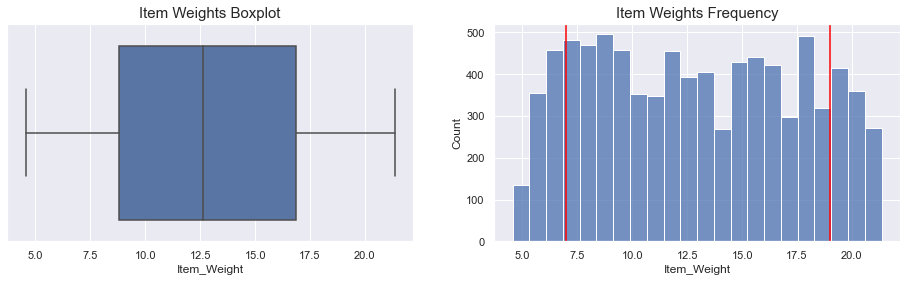

In [15]:
# Find the distribution of the items weight
f, ax = plt.subplots(1, 2, figsize = (16, 4));

sns.boxplot(df.Item_Weight, ax = ax[0]);
ax[0].set_title('Item Weights Boxplot',fontsize=15);
sns.histplot(df.Item_Weight, ax = ax[1]);
ax[1].set_title('Item Weights Frequency',fontsize=15);
ax[1].axvline(np.percentile(df.Item_Weight,87.5)
,color='red')
ax[1].axvline(np.percentile(df.Item_Weight,12)
,color='red')
print(df.Item_Weight.describe())
np.percentile(df.Item_Weight,12),np.percentile(df.Item_Weight,87.5)

- 75% of the weights of the products fall between 6.98 and 19.0


<a id='q2'></a>
###  Low Fat items vs Regular items

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


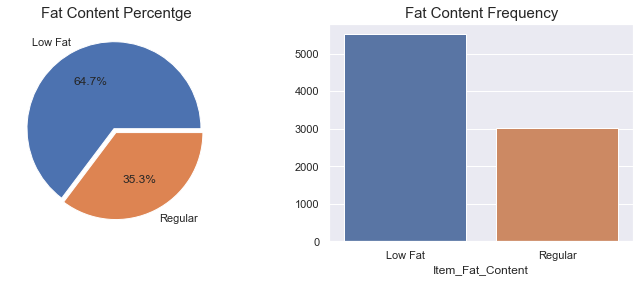

In [16]:
# Find the Comparison of Low Fat and Regular
f,ax=plt.subplots(1,2,figsize=(12,4));

fat_content=df['Item_Fat_Content'].value_counts()

fat_content.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0]);
ax[0].set_title('Fat Content Percentge',fontsize=15);
ax[0].set_ylabel('');

sns.countplot(df['Item_Fat_Content'] ,ax=ax[1]);
ax[1].set_title('Fat Content Frequency',fontsize=15);
ax[1].set_ylabel('');


>*   The Outlets content more low fat items (65%) than regular items (35%).


<a id='q3'></a>
### What is  the visibility distribution?


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


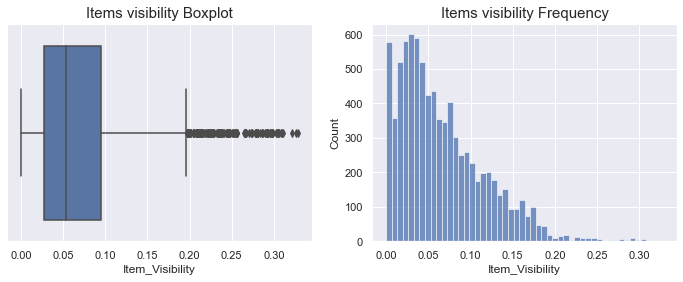

In [17]:
# Find the distribution of the items visibilities
f, ax = plt.subplots(1, 2, figsize = (12, 4));

sns.boxplot(df.Item_Visibility, ax = ax[0]);
ax[0].set_title('Items visibility Boxplot',fontsize=15);

sns.histplot(df.Item_Visibility, ax = ax[1]);
ax[1].set_title('Items visibility Frequency',fontsize=15);

>* Items visibilities distribution is Right-Skewed
>* Most items has a lower visibility rate or they are not displayed at the outlets.

<a id='q4'></a>
### What is the most common item type?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


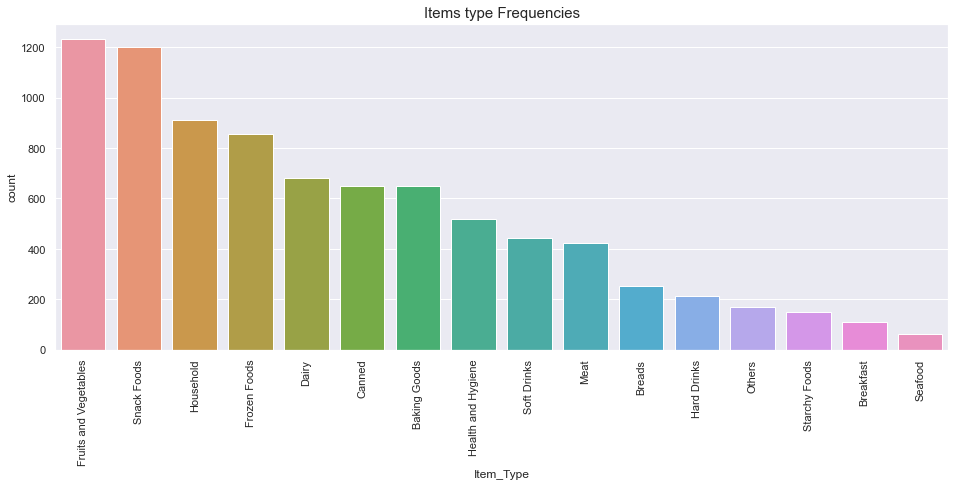

In [18]:
# Find the frequency of each item type
f,ax=plt.subplots(1,1,figsize=(16,6))
sns.countplot(df.Item_Type, order = df['Item_Type'].value_counts().index ,ax = ax);
ax.set_title('Items type Frequencies',fontsize=15);
plt.xticks(rotation=90);


* The most common item types are Fruit / vegetables and snacks
* The least common item is seafood

<a id='q5'></a>
### What is  the MRP distribution?


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

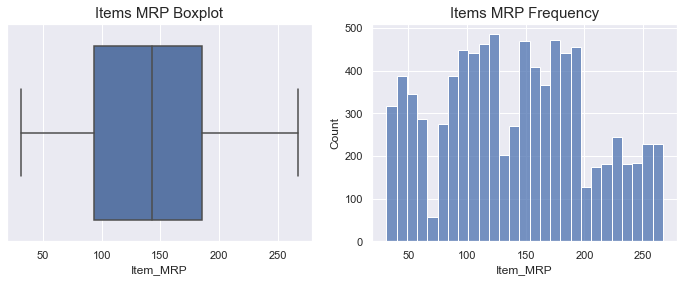

In [19]:
# Find the distribution of the items MRP
f, ax = plt.subplots(1, 2, figsize = (12, 4));

sns.boxplot(df.Item_MRP, ax = ax[0]);
ax[0].set_title('Items MRP Boxplot',fontsize=15);

sns.histplot(df.Item_MRP, ax = ax[1]);
ax[1].set_title('Items MRP Frequency',fontsize=15);
df.Item_MRP.describe()

>* The items price are normally distributed with a mean of 140

<a id='q6'></a>
### What is the most common outlet size?

Text(0, 0.5, '')

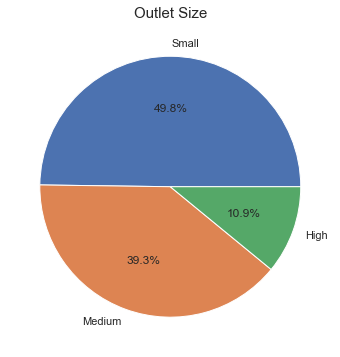

In [85]:
# Find the Comparison of Low Fat and Regular
f,ax=plt.subplots(1,1,figsize=(14,6));

Outlet_Size=df['Outlet_Size'].value_counts()
Outlet_Size.plot.pie(autopct='%1.1f%%',ax=ax);
ax.set_title('Outlet Size',fontsize=15);
ax.set_ylabel('')



>* Most common outlet sizes is small

<a id='q7'></a>
### What is the correlations between the variables?

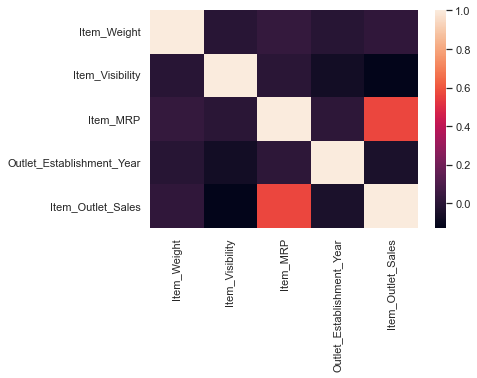

In [21]:
# find the correlations between the variables
sns.heatmap(df.corr());

<a id='q8'></a>
### What is the most selling outlet?

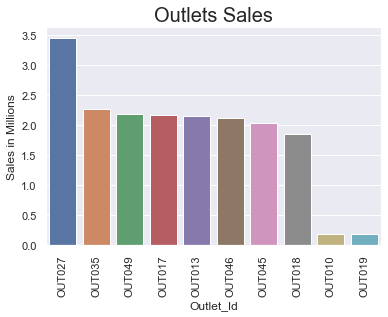

In [22]:
# Find the sum of sales for each outlet
df1 = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

val = pd.DataFrame({'Outlet_Id': df1.index, 'Sales in Millions':df1.apply(lambda x : x / 1000000)})
val.sort_values(by=['Sales in Millions'], inplace = True, ascending=False)

sns.barplot(x="Outlet_Id", y="Sales in Millions", data=val).set_title("Outlets Sales", fontsize = 20);
plt.xticks(rotation=90);


>* Store id OUT027 has the highest sells with over 3 million dollars
>* The store id OUT019	has the lowest sales with less than  0.5 million dollars

<a id='q9'></a>
### What is the correlation beween the MRP and the outlet sales?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


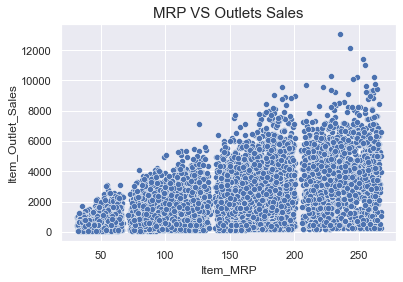

In [23]:
sns.scatterplot(df.Item_MRP, df.Item_Outlet_Sales).set_title("MRP VS Outlets Sales", fontsize = 15);

>* There is a strong positive relationship betweenthe item MRP and outlet sales
>* Items MRP ranging from 200-250 dollars is having high Sales.


### What is the most selling item's fat content?
<a id='q10'></a>

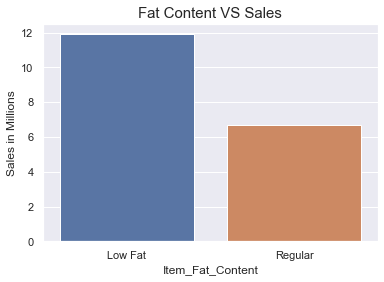

In [24]:
## Find the sum of sales for each fat content
df1 = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()
val = pd.DataFrame({'Item_Fat_Content': df1.index, 'Sales in Millions':df1.apply(lambda x : x / 1000000)})

sns.barplot(x="Item_Fat_Content", y="Sales in Millions", data=val).set_title("Fat Content VS Sales", fontsize = 15);

>* Low fat items has higher sales than the regular items

### Does the outlet size affect the fat content sales?
<a id='q11'></a>

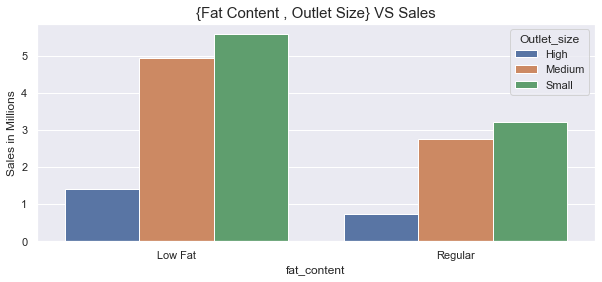

In [25]:
# Group by fat content and outlet size and find the total sales for each group
f,ax=plt.subplots(1,1,figsize=(10,4))

df1 = df.groupby(['Item_Fat_Content','Outlet_Size'])['Item_Outlet_Sales'].sum()
val = pd.DataFrame({'fat_content': df1.index.get_level_values(0),'Outlet_size': df1.index.get_level_values(1), 
                    'Sales in Millions':df1.apply(lambda x : x / 1000000)})

sns.barplot(x="fat_content", y="Sales in Millions",hue = "Outlet_size" ,data=val).set_title(
    "{Fat Content , Outlet Size} VS Sales", fontsize = 15);

>* The outlet size doesn't affect items sales based on their fat content
>* The outlets size has a negative correlation with the sales

### What item type has the most sales
<a id='q12'></a>

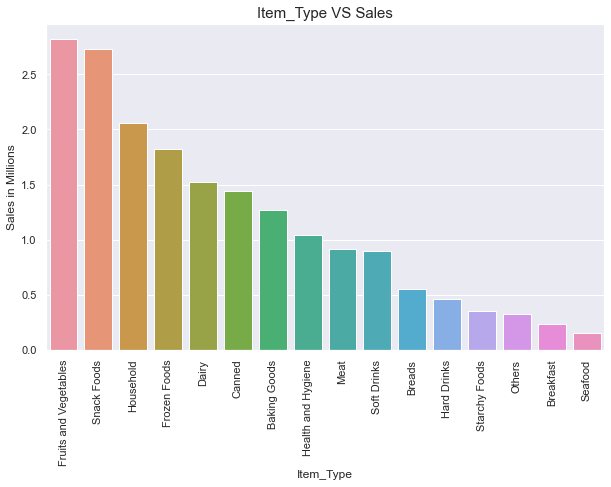

In [26]:
f,ax=plt.subplots(1,1,figsize=(10,6))

df1 = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
val = pd.DataFrame({'Item_Type': df1.index, 'Sales in Millions':df1.apply(lambda x : x / 1000000)})
val.sort_values(by=['Sales in Millions'], inplace = True, ascending=False)

sns.barplot(x="Item_Type", y="Sales in Millions", data=val).set_title("Item_Type VS Sales", fontsize = 15);
plt.xticks(rotation=90);

>* Fruits and vegetables has the highest sales with almost 3 millions across all outlets
>* Seafood has the lowesst sales with less tham 0.25 millions across all outlets


<a id='conclusions'></a>
## Conclusions

>* The maority of outlet sizes are small.
>* Most items sold in outlets are low fat items.
>* Most selling items are Fruits and vegetables while the least is Seafood
>* Majority of sold items are not displayed in the outlets.
>* The MRP has a positive impact on the sales.

